In [56]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_detsys_WireModX/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [57]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [58]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Detector systematic: WireModX

In [59]:
# Load input files
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_detsys_WireModX.root","RECREATE");

#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_CV_all.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'

#additional detector variation file
filename_detsys = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_WireModX_all.root'

tree_name = 'numuCCAna'

In [60]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =     7.644e+18 # 8.649e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0  #E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''

#filename_detsys = filename_detsys+'out33.root'
detsys = ROOT.TChain(tree_name+ "/event","event")
detsys.Add( inputdir + filename_detsys)
pot_detsys = NuCC.getPOT(inputdir,filename_detsys,tree_name)

pot_overlay = pot_overlay
sample = [data,ext,overlay,dirt,detsys]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0,detsys:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt',detsys:'detsys'}
scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
scale_detsys = pot_data/pot_detsys
scale[detsys] = scale_detsys
print 'Detsys POT:', pot_detsys, ' Scale: ', scale_detsys
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	96450
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.19653398031e+20
Dirt:		1.25019694173e+20

Detsys POT: 1.12265011704e+20  Scale:  0.0680888897084
Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0638845208392
Dirt:		0.0611423668132


In [61]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'
    
    filename_detsys = filename_detsys+'out4.root'
    detsys_out = ROOT.TChain(tree_name,"t_out")
    detsys_out.Add( inputdir + filename_detsys)
    print "Detsys: Number of Entries:\t", detsys_out.GetEntries()

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out, detsys_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0, detsys_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt',detsys_out:'detsys'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]
    scale_out[detsys_out] = scale_detsys

Detsys: Number of Entries:	90508
Overlay: Number of Entries:	96446
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [62]:
##### flux and number of tragets parameters###
#flux = 1.16859e11/1.592e20 # flux per POT per cm2
flux = 7.3789785277e-10
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [63]:
'''fidVol = '((Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50)))'
MCfidVol = '((MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)))'
numu_signal = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5)' # numu CC signal definition
numu_true = '('+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14)' # numu CC signal definition
numu_nomu = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5)' # not an MC muon
numu_lowpur = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5)' #low purity
numu_nc = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==1)' # nutral current
numu_ov = '('+fidVol+' && !'+MCfidVol+')' # out of fiducial
numu_other = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG!=14)' # e.g anti nu or nue

track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && ('+track_end_uncontained+'==1 || nr_crthit_beam_tres==0) && (abs(crtt0_time-4)<0.8 || crtt0_time==-1)'

cut = fidVol+' && (key_muon==track_key) && '+crt_tom_cut+' && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

print cut

overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}'''

"fidVol = '((Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50)))'\nMCfidVol = '((MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)))'\nnumu_signal = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5)' # numu CC signal definition\nnumu_true = '('+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14)' # numu CC signal definition\nnumu_nomu = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5)' # not an MC muon\nnumu_lowpur = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5)' #low purity\nnumu_nc = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==1)' # nutral current\nnumu_ov = '('+fidVol+' && !'+MCfidVol+')' # out of fiducial\nnumu_other = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG

In [64]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [65]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [66]:
'''track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
'''
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

detsys_out.SetAlias("track_end_uncontained",track_end_uncontained)
detsys.SetAlias("track_end_uncontained",track_end_uncontained)
detsys.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
detsys_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
detsys.SetAlias("crt_tom_cut",crt_tom_cut)
detsys_out.SetAlias("crt_tom_cut",crt_tom_cut)


weight_name = 'EventWeight*TunedCentralValue_Genie'


In [67]:
# Load the global variables for access of functions
#NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()

In [68]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [69]:
crt_ = detsys_out.GetEntries('muon && fidVol && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1')
print crt_
crt_ = detsys_out.GetEntries('crtt0_time>-2000 && muon && fidVol && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1')
print crt_
crt_ = detsys_out.GetEntries('crtt0_time<-2000 && muon && fidVol && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1')
print crt_

15751
15751
0


In [70]:
#asdfsdaf

In [71]:
print numu_signal

fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5


In [72]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
print 'Passing events after: '
nocut_ = detsys_out.GetEntries()
pre_ = detsys_out.GetEntries('muon')
fidvol_ = detsys_out.GetEntries('muon && fidVol')
crt_ = detsys_out.GetEntries('muon && fidVol && crt_tom_cut')
trackscore_ = detsys_out.GetEntries('muon && fidVol && crt_tom_cut && TrackScore>0.8')
tracklength_ = detsys_out.GetEntries('muon && fidVol && crt_tom_cut && TrackScore>0.8 && TrackLength>20')
trackPID_ = detsys_out.GetEntries('muon && fidVol && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78')
NuScore_ = detsys_out.GetEntries('muon && fidVol && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1')


print 'No cut: ',nocut_
print 'Preselection: ',pre_
print '... + fidVol: ',fidvol_
print '... + crt_tom_cut: ',crt_
print '... + TrackScore: ',trackscore_
print '... + TrackLength: ',tracklength_
print '... + TrackPID_chiproton: ',trackPID_
print '... + NuScore: ',NuScore_

print nocut_,' & ',pre_,' & ',fidvol_,' & ',crt_,' & ',trackscore_,' & ',tracklength_,' & ',trackPID_,' & ',NuScore_

print '%.0f'%(nocut_*scale_out[detsys_out]),' & ','%.0f'%(pre_*scale_out[detsys_out]),' & ','%.0f'%(fidvol_*scale_out[detsys_out]),' & ','%.0f'%(crt_*scale_out[detsys_out]),' & ','%.0f'%(trackscore_*scale_out[detsys_out]),' & ','%.0f'%(tracklength_*scale_out[detsys_out]),' & ','%.0f'%(trackPID_*scale_out[detsys_out]),' & ','%.0f'%(NuScore_*scale_out[detsys_out])

cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'


Passing events after: 
No cut:  90508
Preselection:  37917
... + fidVol:  25454
... + crt_tom_cut:  22036
... + TrackScore:  20445
... + TrackLength:  18655
... + TrackPID_chiproton:  17538
... + NuScore:  14871
90508  &  37917  &  25454  &  22036  &  20445  &  18655  &  17538  &  14871
6163  &  2582  &  1733  &  1500  &  1392  &  1270  &  1194  &  1013


In [73]:
# calculate total flux integrated cross section:

N_data = data_out.GetEntries(cut)
N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+' && numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries(numu_true)*scale_out[overlay_out]
#print N_dirt, N_overlay
N_overlay_detsys = detsys_out.GetEntries(cut+'&& !numu_signal')*scale_out[detsys_out]
N_signal_detsys = detsys_out.GetEntries(cut+'&& numu_signal')*scale_out[detsys_out]
N_true_detsys = detsys_out.GetEntries('numu_true')*scale_out[detsys_out]
 
h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
dirt_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func','numu_true','0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]

h_weight_func2 = ROOT.TH1F("h_weight_func2",'h_weight_func',10000,0,1000)
detsys_out.Draw(weight_name+'>>h_weight_func2',cut+' && numu_signal','0') # weights for signal definition
detsys_signal = h_weight_func2.GetMean()
detsys_out.Draw(weight_name+'>>h_weight_func2',cut+' && !numu_signal','0') # weights for signal definition
detsys_pass_weight = h_weight_func2.GetMean()
detsys_out.Draw(weight_name+'>>h_weight_func2','numu_true','0') # weights for signal definition
detsys_true_weight = h_weight_func2.GetMean()

print 'Weights for CV', overlay_signal, overlay_pass_weight, overlay_true_weight
print 'Weights for detsys', detsys_signal, detsys_pass_weight, detsys_true_weight

N_dirt = N_dirt*dirt_pass_weight

N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight

N_overlay_detsys = N_overlay_detsys*detsys_pass_weight
N_signal_detsys = N_signal_detsys*detsys_signal
N_true_detsys = N_true_detsys*detsys_true_weight

eff = N_signal/(N_true+1e-80)
eff_detsys = N_signal_detsys/(N_true_detsys+1e-80)

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff*beam_flux*N_tot+1e-80)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Total integrated cross section:', sigma_tot
sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot+1e-80)
print 'Total integrated cross section for MC:', sigma_tot_MC

sigma_tot_detsys = (N_data- (N_ext+N_dirt+N_overlay_detsys))/(eff_detsys*beam_flux*N_tot+1e-80)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay_detsys
print 'Number of overlay signal:', N_signal_detsys
print 'Total integrated cross section:', sigma_tot_detsys
sigma_tot_MC_detsys = (N_signal_detsys)/(eff_detsys*beam_flux*N_tot+1e-80)
print 'Total integrated cross section for MC:', sigma_tot_MC_detsys

Weights for CV 1.17342719546 1.1166576973 1.21136549457
Weights for detsys 1.17169612093 1.102481546 1.20690226283
Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1298248268
Number of overlay: 201.313414536
Number of overlay signal: 970.556760372
Total integrated cross section: 8.10645459826e-39
Total integrated cross section for MC: 8.09127367715e-39
Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1298248268
Number of overlay: 204.406744977
Number of overlay signal: 969.161219612
Total integrated cross section: 8.04943472456e-39
Total integrated cross section for MC: 8.04841179359e-39


In [19]:
def make_mc_hist(cut,variable,xtitle,xstart,xend,xbins,name):
    weight_name = 'EventWeight*TunedCentralValue_Genie'
    h_bgk = ROOT.TH1F("h_bgk",'h_bgk',xbins,xstart,xend)
    detsys_out.Draw(variable+'>>h_bgk',weight_name+'*('+cut+')','')
    h_bgk.SetXTitle(xtitle)
    h_bgk.SetYTitle("Entries per bin")
    h_bgk.Scale(scale_out[detsys_out])
    h_bgk.Draw("")
    h_bgk.Write(name)
    return

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && !numu_signal'
name = '_bkg_all'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,200,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,10,10,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,10,10,'NumPfp'+name)

make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton PID',0,500,50,'PID_chiproton2'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon'+name) 
make_mc_hist(cut_bkg+' && track_end_uncontained!=1','TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon_cont'+name) 


name = '_bkg_all_fine'
bins_ = 60
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,bins_,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,bins_,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,bins_,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,bins_,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,bins_,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,bins_,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,bins_,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,200,bins_,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,bins_,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,bins_,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,10,10,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,10,10,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,bins_,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,bins_,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,20,20,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,20,20,'NumPfp'+name) 

#make_mc_hist(cut_bkg,'TrackMomMCS_mom','Topological Score',0,2.5,20,'NuScore'+name) 

cut_bkg = 'fidVol && muon && !numu_signal'
name = '_bkg_pre'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,200,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,10,10,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,10,10,'NumPfp'+name) 

make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton PID',0,500,50,'PID_chiproton2'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon'+name) 
make_mc_hist(cut_bkg+' && track_end_uncontained!=1','TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon_cont'+name) 



name = '_bkg_pre_fine'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,bins_,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,bins_,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,bins_,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,bins_,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,bins_,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,bins_,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,bins_,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,200,bins_,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,bins_,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,bins_,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,10,10,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,10,10,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,bins_,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,bins_,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,20,20,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,20,20,'NumPfp'+name) 


cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
name = '_sig_all'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,200,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,10,10,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,10,10,'NumPfp'+name) 

make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton PID',0,500,50,'PID_chiproton2'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon'+name) 
make_mc_hist(cut_bkg+' && track_end_uncontained!=1','TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon_cont'+name) 


#make_mc_hist(cut_bkg,'TrackMomMCS_mom','Topological Score',0,2.5,20,'NuScore'+name) 

cut_bkg = 'fidVol && muon && numu_signal'
name = '_sig_pre'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,200,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,10,10,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,10,10,'NumPfp'+name) 

make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton PID',0,500,50,'PID_chiproton2'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon'+name) 
make_mc_hist(cut_bkg+' && track_end_uncontained!=1','TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon_cont'+name) 


#make_mc_hist(cut_bkg,'TrackMomMCS_mom','Topological Score',0,2.5,20,'NuScore'+name) 

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && Nu_Vx_sce!=-999'
name = '_pass_all'
bins_ = 20
make_mc_hist(cut_bkg,'Nu_Vx_sce - MCNu_Vx','Reco - True: Vx',-200,200,bins_,'DiffVx'+name)
make_mc_hist(cut_bkg,'Nu_Vy_sce - MCNu_Vy','Reco - True: Vy',-200,200,bins_,'DiffVy'+name)
make_mc_hist(cut_bkg,'Nu_Vz_sce - MCNu_Vz','Reco - True: Vz',-200,200,bins_,'DiffVz'+name)
make_mc_hist(cut_bkg,'sqrt((Nu_Vx_sce-MCNu_Vx)*(Nu_Vx_sce-MCNu_Vx)+(Nu_Vy_sce-MCNu_Vy)*(Nu_Vy_sce-MCNu_Vy)+(Nu_Vz_sce-MCNu_Vz)*(Nu_Vz_sce-MCNu_Vz))','Reco - True: Vertex',0,200,bins_,'DiffVertex'+name)

cut_bkg = cut_bkg+' && MCTrackPurity>0.5'
make_mc_hist(cut_bkg,'TrackStart_x_sce - MCTrackStart_x','Reco - True: start Track x',-200,200,bins_,'DiffTrackSx'+name)
make_mc_hist(cut_bkg,'TrackStart_y_sce - MCTrackStart_y','Reco - True: start Track y',-200,200,bins_,'DiffTrackSy'+name)
make_mc_hist(cut_bkg,'TrackStart_z_sce - MCTrackStart_z','Reco - True: start Track z',-200,200,bins_,'DiffTrackSz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackStart_x_sce-MCTrackStart_x)*(TrackStart_x_sce-MCTrackStart_x)+(TrackStart_y_sce-MCTrackStart_y)*(TrackStart_y_sce-MCTrackStart_y)+(TrackStart_z_sce-MCTrackStart_z)*(TrackStart_z_sce-MCTrackStart_z))','Reco - True: Track Start',0,200,bins_,'DiffTrackStart'+name)

make_mc_hist(cut_bkg,'TrackEnd_x_sce - MCTrackEnd_x','Reco - True: end Track x',-200,200,bins_,'DiffTrackEx'+name)
make_mc_hist(cut_bkg,'TrackEnd_y_sce - MCTrackEnd_y','Reco - True: end Track y',-200,200,bins_,'DiffTrackEy'+name)
make_mc_hist(cut_bkg,'TrackEnd_z_sce - MCTrackEnd_z','Reco - True: end Track z',-200,200,bins_,'DiffTrackEz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackEnd_x_sce-MCTrackEnd_x)*(TrackEnd_x_sce-MCTrackEnd_x)+(TrackEnd_y_sce-MCTrackEnd_y)*(TrackEnd_y_sce-MCTrackEnd_y)+(TrackEnd_z_sce-MCTrackEnd_z)*(TrackEnd_z_sce-MCTrackEnd_z))','Reco - True: Track End',0,2000,bins_,'DiffTrackEnd'+name)

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && Nu_Vx_sce!=-999'
name = '_pass_all_fine'
bins_ = 100
make_mc_hist(cut_bkg,'Nu_Vx_sce - MCNu_Vx','Reco - True: Vx',-50,50,bins_,'DiffVx'+name)
make_mc_hist(cut_bkg,'Nu_Vy_sce - MCNu_Vy','Reco - True: Vy',-50,50,bins_,'DiffVy'+name)
make_mc_hist(cut_bkg,'Nu_Vz_sce - MCNu_Vz','Reco - True: Vz',-50,50,bins_,'DiffVz'+name)
make_mc_hist(cut_bkg,'sqrt((Nu_Vx_sce-MCNu_Vx)*(Nu_Vx_sce-MCNu_Vx)+(Nu_Vy_sce-MCNu_Vy)*(Nu_Vy_sce-MCNu_Vy)+(Nu_Vz_sce-MCNu_Vz)*(Nu_Vz_sce-MCNu_Vz))','Reco - True: Vertex',0,50,bins_,'DiffVertex'+name)

cut_bkg = cut_bkg+' && MCTrackPurity>0.5'
make_mc_hist(cut_bkg,'TrackStart_x_sce - MCTrackStart_x','Reco - True: start Track x',-50,50,bins_,'DiffTrackSx'+name)
make_mc_hist(cut_bkg,'TrackStart_y_sce - MCTrackStart_y','Reco - True: start Track y',-50,50,bins_,'DiffTrackSy'+name)
make_mc_hist(cut_bkg,'TrackStart_z_sce - MCTrackStart_z','Reco - True: start Track z',-50,50,bins_,'DiffTrackSz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackStart_x_sce-MCTrackStart_x)*(TrackStart_x_sce-MCTrackStart_x)+(TrackStart_y_sce-MCTrackStart_y)*(TrackStart_y_sce-MCTrackStart_y)+(TrackStart_z_sce-MCTrackStart_z)*(TrackStart_z_sce-MCTrackStart_z))','Reco - True: Track Start',0,50,bins_,'DiffTrackStart'+name)

make_mc_hist(cut_bkg,'TrackEnd_x_sce - MCTrackEnd_x','Reco - True: end Track x',-50,50,bins_,'DiffTrackEx'+name)
make_mc_hist(cut_bkg,'TrackEnd_y_sce - MCTrackEnd_y','Reco - True: end Track y',-50,50,bins_,'DiffTrackEy'+name)
make_mc_hist(cut_bkg,'TrackEnd_z_sce - MCTrackEnd_z','Reco - True: end Track z',-50,50,bins_,'DiffTrackEz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackEnd_x_sce-MCTrackEnd_x)*(TrackEnd_x_sce-MCTrackEnd_x)+(TrackEnd_y_sce-MCTrackEnd_y)*(TrackEnd_y_sce-MCTrackEnd_y)+(TrackEnd_z_sce-MCTrackEnd_z)*(TrackEnd_z_sce-MCTrackEnd_z))','Reco - True: Track End',0,2000,bins_,'DiffTrackEnd'+name)

cut_bkg = 'fidVol && muon && Nu_Vx_sce!=-999'
name = '_pass_pre'
bins_ = 20
make_mc_hist(cut_bkg,'Nu_Vx_sce - MCNu_Vx','Reco - True: Vx',-200,200,bins_,'DiffVx'+name)
make_mc_hist(cut_bkg,'Nu_Vy_sce - MCNu_Vy','Reco - True: Vy',-200,200,bins_,'DiffVy'+name)
make_mc_hist(cut_bkg,'Nu_Vz_sce - MCNu_Vz','Reco - True: Vz',-200,200,bins_,'DiffVz'+name)
make_mc_hist(cut_bkg,'sqrt((Nu_Vx_sce-MCNu_Vx)*(Nu_Vx_sce-MCNu_Vx)+(Nu_Vy_sce-MCNu_Vy)*(Nu_Vy_sce-MCNu_Vy)+(Nu_Vz_sce-MCNu_Vz)*(Nu_Vz_sce-MCNu_Vz))','Reco - True: Vertex',0,200,bins_,'DiffVertex'+name)

cut_bkg = cut_bkg+' && MCTrackPurity>0.5'
make_mc_hist(cut_bkg,'TrackStart_x_sce - MCTrackStart_x','Reco - True: start Track x',-200,200,bins_,'DiffTrackSx'+name)
make_mc_hist(cut_bkg,'TrackStart_y_sce - MCTrackStart_y','Reco - True: start Track y',-200,200,bins_,'DiffTrackSy'+name)
make_mc_hist(cut_bkg,'TrackStart_z_sce - MCTrackStart_z','Reco - True: start Track z',-200,200,bins_,'DiffTrackSz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackStart_x_sce-MCTrackStart_x)*(TrackStart_x_sce-MCTrackStart_x)+(TrackStart_y_sce-MCTrackStart_y)*(TrackStart_y_sce-MCTrackStart_y)+(TrackStart_z_sce-MCTrackStart_z)*(TrackStart_z_sce-MCTrackStart_z))','Reco - True: Track Start',0,200,bins_,'DiffTrackStart'+name)

make_mc_hist(cut_bkg,'TrackEnd_x_sce - MCTrackEnd_x','Reco - True: end Track x',-200,200,bins_,'DiffTrackEx'+name)
make_mc_hist(cut_bkg,'TrackEnd_y_sce - MCTrackEnd_y','Reco - True: end Track y',-200,200,bins_,'DiffTrackEy'+name)
make_mc_hist(cut_bkg,'TrackEnd_z_sce - MCTrackEnd_z','Reco - True: end Track z',-200,200,bins_,'DiffTrackEz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackEnd_x_sce-MCTrackEnd_x)*(TrackEnd_x_sce-MCTrackEnd_x)+(TrackEnd_y_sce-MCTrackEnd_y)*(TrackEnd_y_sce-MCTrackEnd_y)+(TrackEnd_z_sce-MCTrackEnd_z)*(TrackEnd_z_sce-MCTrackEnd_z))','Reco - True: Track End',0,2000,bins_,'DiffTrackEnd'+name)

cut_bkg = 'fidVol && muon && Nu_Vx_sce!=-999'
name = '_pass_pre_fine'
bins_ = 100
make_mc_hist(cut_bkg,'Nu_Vx_sce - MCNu_Vx','Reco - True: Vx',-50,50,bins_,'DiffVx'+name)
make_mc_hist(cut_bkg,'Nu_Vy_sce - MCNu_Vy','Reco - True: Vy',-50,50,bins_,'DiffVy'+name)
make_mc_hist(cut_bkg,'Nu_Vz_sce - MCNu_Vz','Reco - True: Vz',-50,50,bins_,'DiffVz'+name)
make_mc_hist(cut_bkg,'sqrt((Nu_Vx_sce-MCNu_Vx)*(Nu_Vx_sce-MCNu_Vx)+(Nu_Vy_sce-MCNu_Vy)*(Nu_Vy_sce-MCNu_Vy)+(Nu_Vz_sce-MCNu_Vz)*(Nu_Vz_sce-MCNu_Vz))','Reco - True: Vertex',0,50,bins_,'DiffVertex'+name)

cut_bkg = cut_bkg+' && MCTrackPurity>0.5'
make_mc_hist(cut_bkg,'TrackStart_x_sce - MCTrackStart_x','Reco - True: start Track x',-50,50,bins_,'DiffTrackSx'+name)
make_mc_hist(cut_bkg,'TrackStart_y_sce - MCTrackStart_y','Reco - True: start Track y',-50,50,bins_,'DiffTrackSy'+name)
make_mc_hist(cut_bkg,'TrackStart_z_sce - MCTrackStart_z','Reco - True: start Track z',-50,50,bins_,'DiffTrackSz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackStart_x_sce-MCTrackStart_x)*(TrackStart_x_sce-MCTrackStart_x)+(TrackStart_y_sce-MCTrackStart_y)*(TrackStart_y_sce-MCTrackStart_y)+(TrackStart_z_sce-MCTrackStart_z)*(TrackStart_z_sce-MCTrackStart_z))','Reco - True: Track Start',0,50,bins_,'DiffTrackStart'+name)

make_mc_hist(cut_bkg,'TrackEnd_x_sce - MCTrackEnd_x','Reco - True: end Track x',-50,50,bins_,'DiffTrackEx'+name)
make_mc_hist(cut_bkg,'TrackEnd_y_sce - MCTrackEnd_y','Reco - True: end Track y',-50,50,bins_,'DiffTrackEy'+name)
make_mc_hist(cut_bkg,'TrackEnd_z_sce - MCTrackEnd_z','Reco - True: end Track z',-50,50,bins_,'DiffTrackEz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackEnd_x_sce-MCTrackEnd_x)*(TrackEnd_x_sce-MCTrackEnd_x)+(TrackEnd_y_sce-MCTrackEnd_y)*(TrackEnd_y_sce-MCTrackEnd_y)+(TrackEnd_z_sce-MCTrackEnd_z)*(TrackEnd_z_sce-MCTrackEnd_z))','Reco - True: Track End',0,2000,bins_,'DiffTrackEnd'+name)


In [20]:
cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && !numu_signal'
name = '_bkg_all'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
name = '_sig_all'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 

cut_bkg = 'fidVol && muon && !numu_signal'
name = '_bkg_pre'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 

cut_bkg = 'fidVol && muon && numu_signal'
name = '_sig_pre'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 


In [74]:
print eff,N_signal,(N_true+0.000001)
print eff,N_signal/scale_out[overlay_out],(N_true+0.000001)/scale_out[overlay_out]
print eff_detsys,N_signal_detsys,(N_true_detsys+0.000001)

print 'Scaling: ', scale_out[detsys_out],scale_out[overlay_out],scale_out[dirt_out],scale_out[ext_out],scale_out[data_out]

print 'xsec percent diff MC: ', (sigma_tot_MC-sigma_tot_MC_detsys)/sigma_tot_MC
print 'xsec percent diff: ', (sigma_tot-sigma_tot_detsys)/sigma_tot


0.518265952699 970.556760372 1872.7002147
0.518265952699 15192.3618996 29313.8336188
0.520276811299 969.161219612 1862.7799646
Scaling:  0.0680888897084 0.0638845208392 0.0611423668132 0.0967862715198 1.0
xsec percent diff MC:  0.00529729746673
xsec percent diff:  0.00703388552927


In [22]:
#NuCC.printEff_out(cut)

In [23]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

622

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h_eff_trueMom.root has been created


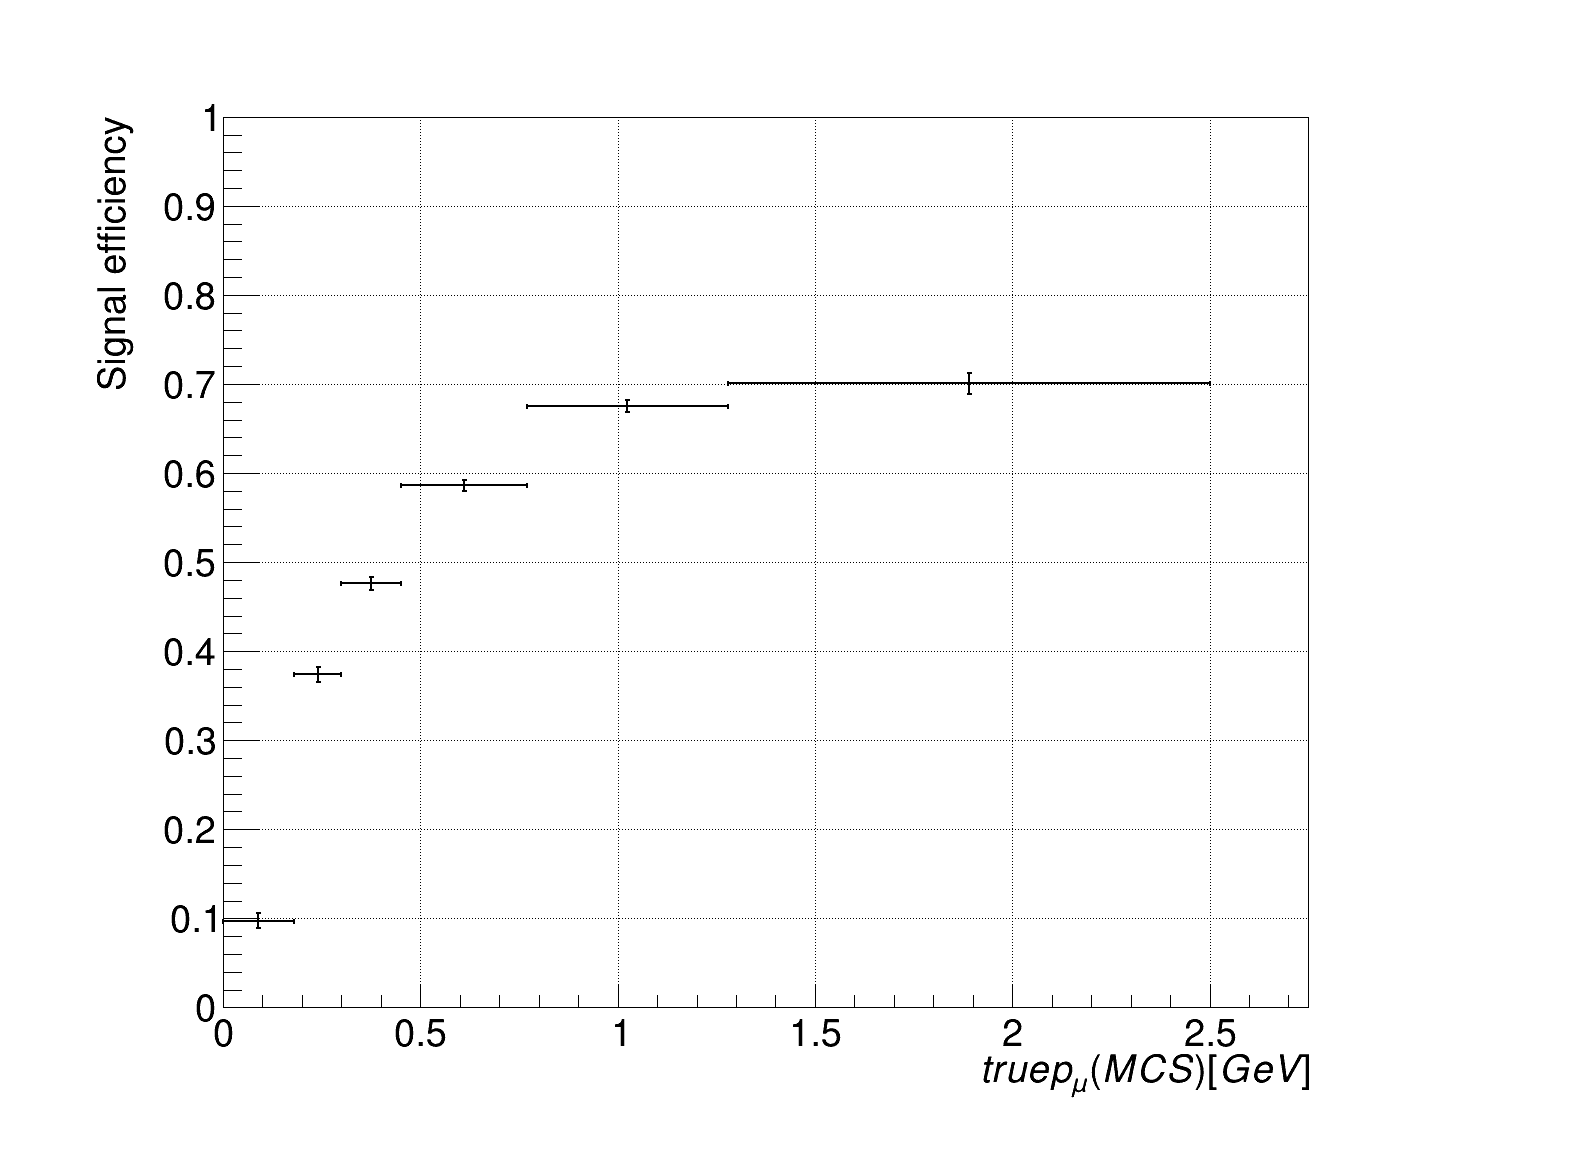

In [24]:

weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = cut+' && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("true p_{\mu} (MCS) [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(outputdir_root + "h_eff_trueMom.root")

eff.Write("h_eff_true")

11072

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h2_true_MCS.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h2_true_MCS.png has been created


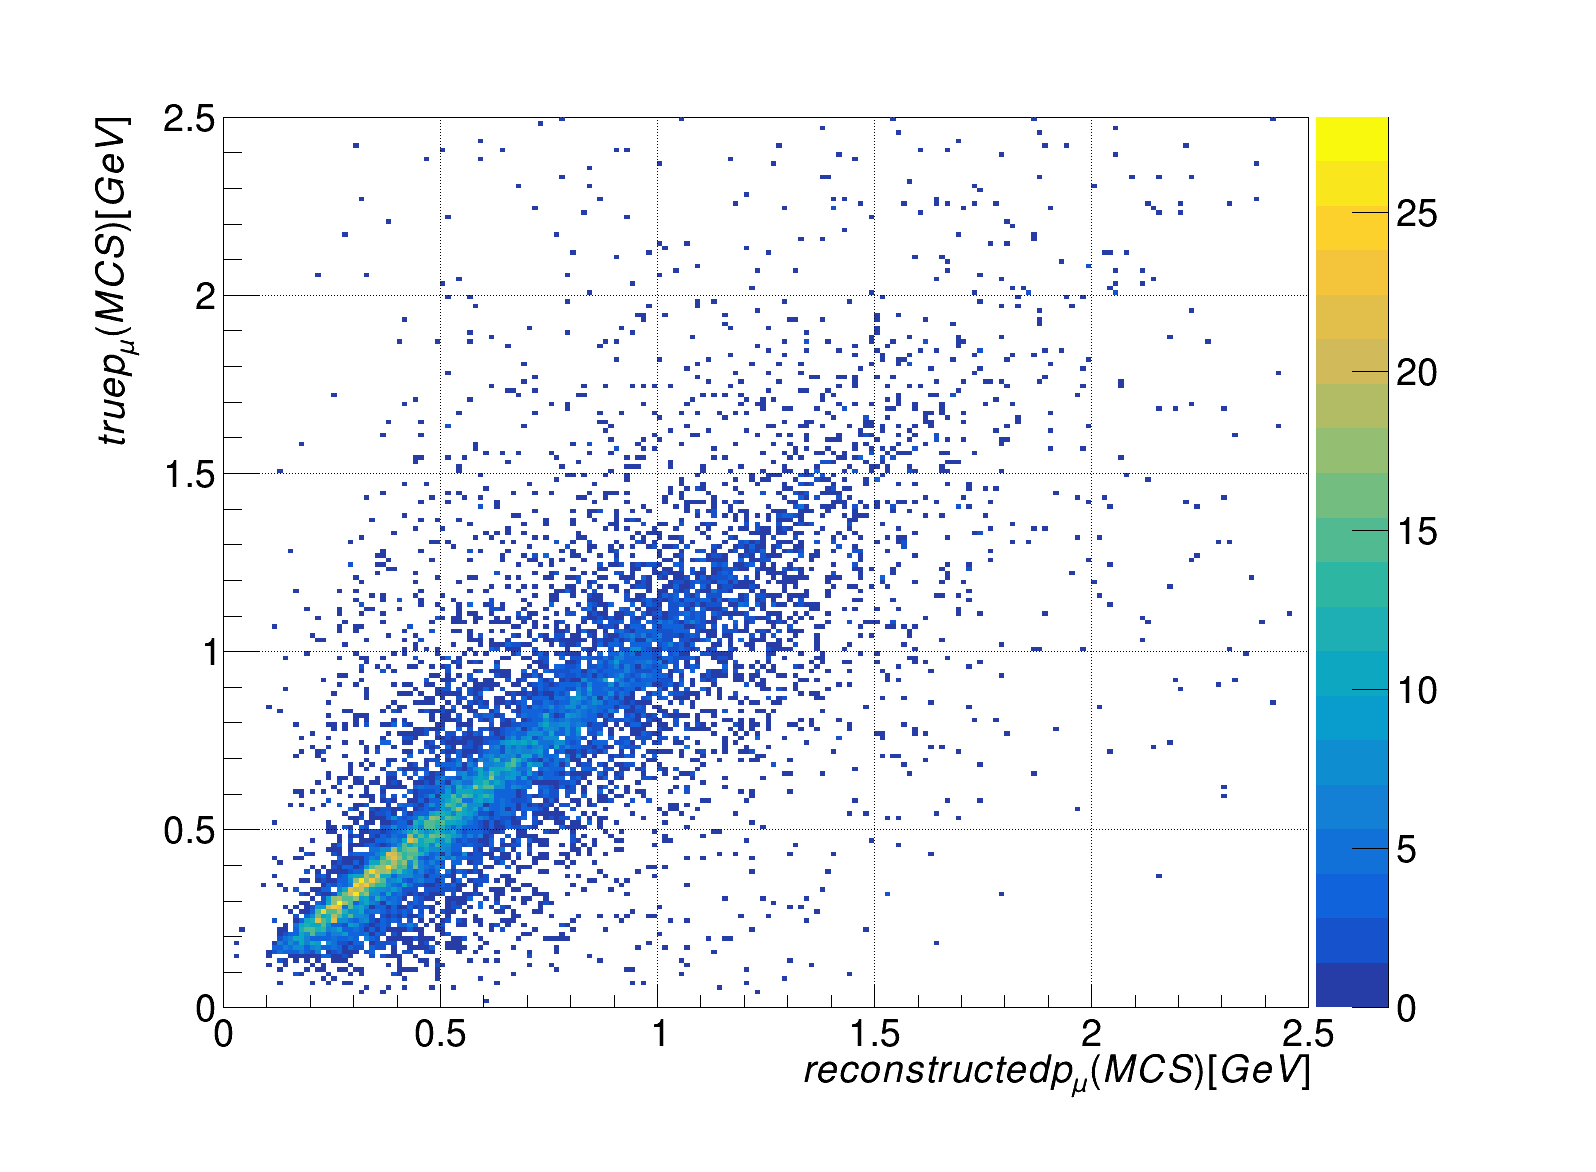

In [25]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&&numu_true)','')
h_migration.SetXTitle("reconstructed p_{\mu} (MCS) [GeV]")
h_migration.SetYTitle("true p_{\mu} (MCS) [GeV]")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_MCS.root")
c1.SaveAs(outputdir_png + "h2_true_MCS.png")
h_migration.Write("h2_true_MCS_fine")

668

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h2_true_MCS_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h2_true_MCS_bin.png has been created


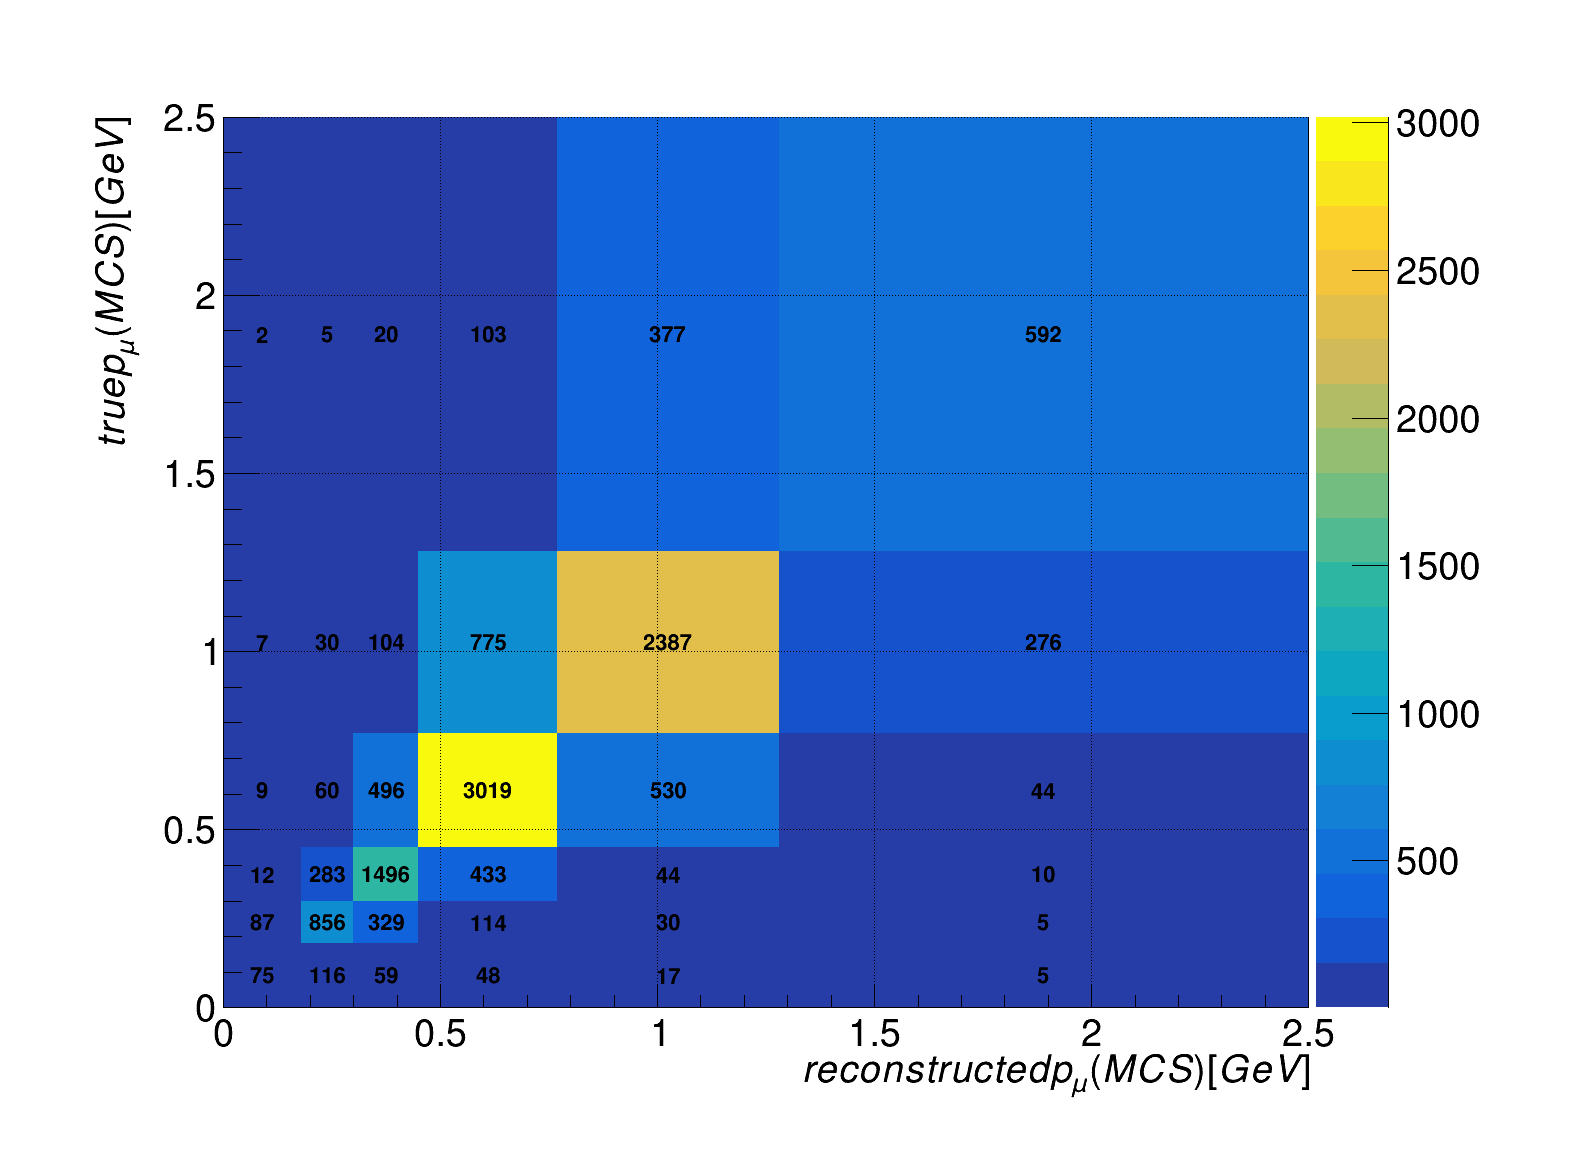

In [26]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&&numu_true)','')
h_migration.SetXTitle("reconstructed p_{\mu} (MCS) [GeV]")
h_migration.SetYTitle("true p_{\mu} (MCS) [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(outputdir_png + "h2_true_MCS_bin.png")
h_migration.Write("h2_true_MCS_bin")

[[0.234375   0.06122449 0.00526316 0.00215983 0.00194932 0.00179856]
 [0.3625     0.60239268 0.12412281 0.01439885 0.00835422 0.0044964 ]
 [0.184375   0.23152709 0.65614035 0.11903048 0.02896129 0.01798561]
 [0.15       0.08022519 0.18991228 0.72450204 0.21581732 0.0926259 ]
 [0.053125   0.02111189 0.01929825 0.12718982 0.66471735 0.33902878]
 [0.015625   0.00351865 0.00438596 0.01055916 0.07685881 0.5323741 ]
 [0.         0.         0.00087719 0.00215983 0.00334169 0.01169065]]


648

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h_mitigation_matrix.root has been created


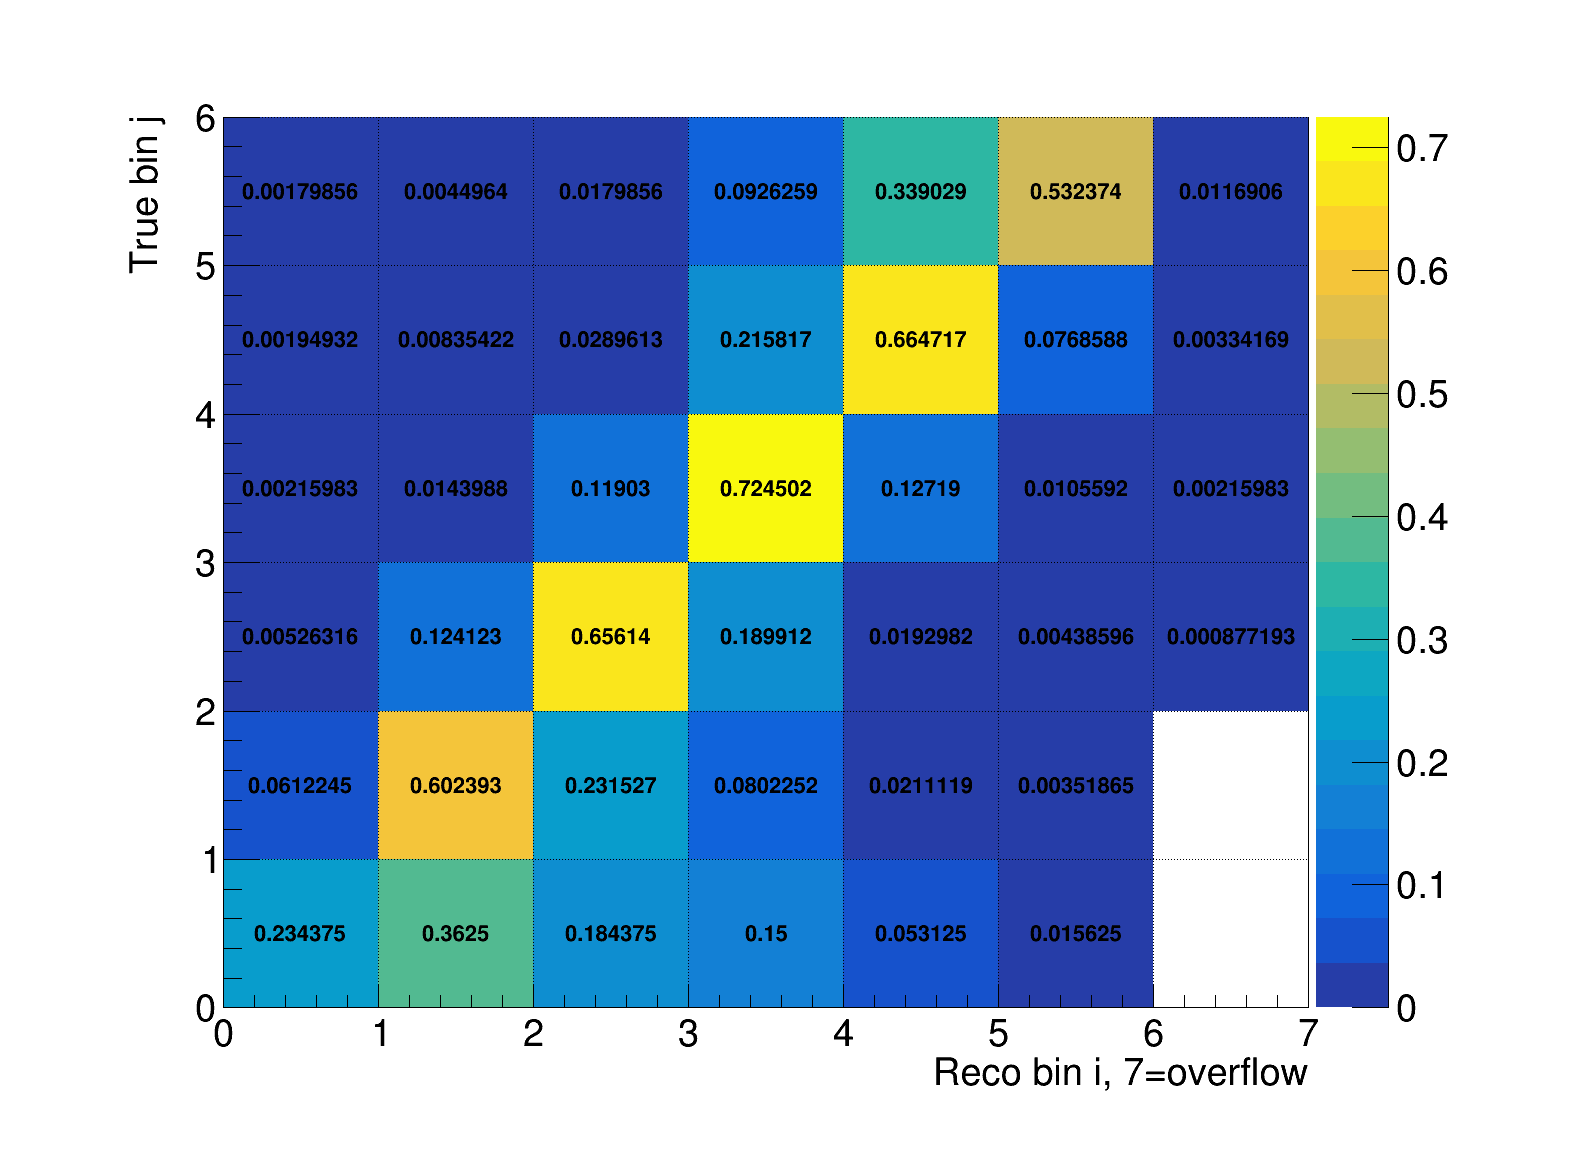

In [27]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((7,6))

for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
        
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',7,0,7,6,0,6)
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        
print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(outputdir_root + "h_mitigation_matrix.root")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [28]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

415

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [29]:
# e tilde
N_sel = np.zeros((6))
N_gen = np.zeros((6))
Err_sel = np.zeros((6))
Err_gen = np.zeros((6))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    Err_sel[i-1] = h_init_eff_energy.GetBinError(i)
    Err_gen[i-1] = h_init_eff_energy_1.GetBinError(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
err_tilde = np.zeros((6))
err_tilde = mitigation_matrix.dot(Err_sel)/(mitigation_matrix.dot(Err_gen))
print eff_tilde
print err_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)


136.0 1394.0 0.0975609756097561
1136.0 3039.0 0.3738071734123067
2061.0 4329.0 0.4760914760914761
4011.0 6842.0 0.5862320958783981
3517.0 5207.0 0.6754369118494334
1092.0 1558.0 0.7008985879332478
[0.2303526  0.35782818 0.46708128 0.56920195 0.64729864 0.67179931
 0.64569927]
[0.41575116 0.55768996 0.65715952 0.7358596  0.79813944 0.81824659
 0.81059565]


In [30]:
for i in range(1,binnum+1):
    Err_sel[i-1] =  (eff.GetEfficiencyErrorLow(i) +  eff.GetEfficiencyErrorUp(i))/2.0
    print Err_sel[i-1]
    
err_tilde = mitigation_matrix.dot(Err_sel)
print err_tilde

0.008262236585357949
0.00889079244864635
0.007663192595970786
0.0059938230703783235
0.006548045115847723
0.01185309088642772
[0.00256816 0.00949629 0.00972621 0.01026156 0.00990801 0.00707083
 0.00018012]


465

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h_eff_tilde_xsecMom.root has been created


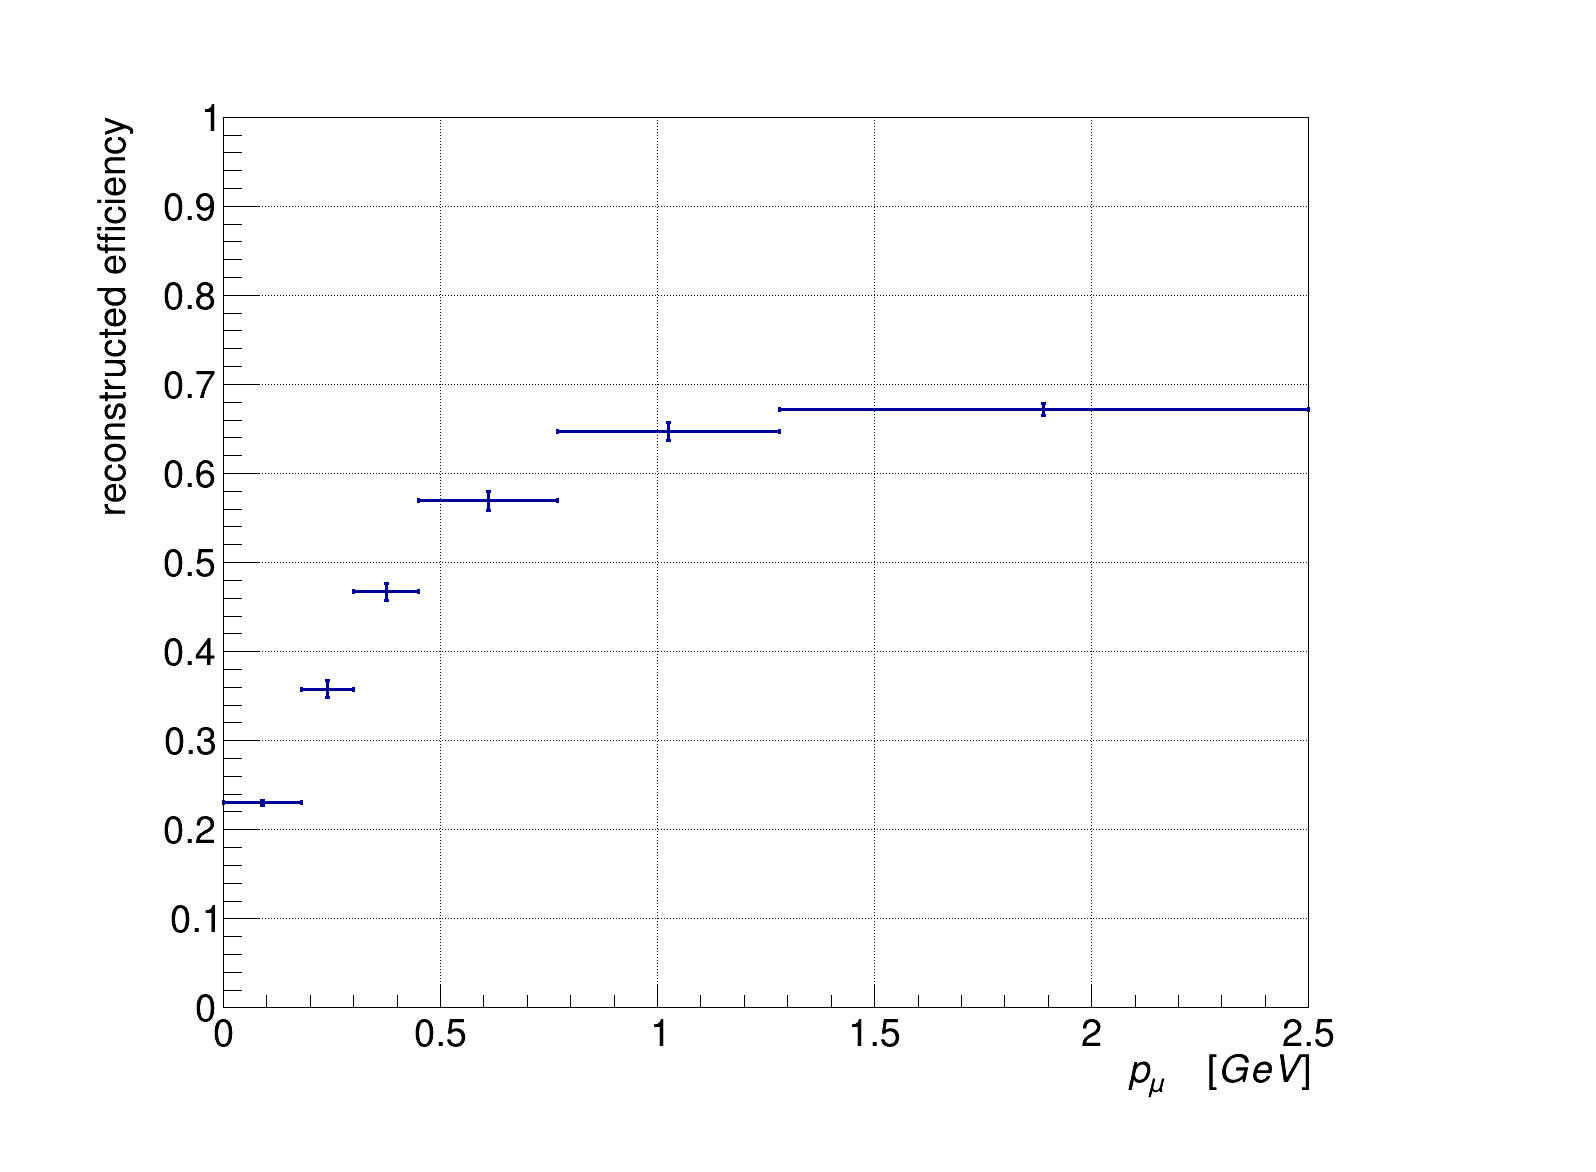

In [31]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,err_tilde[i-1])
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.Draw('E1')
h_eff_tilde.SetYTitle("reconstructed efficiency")
h_eff_tilde.SetXTitle("p_{\mu} \quad [GeV]")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecMom.root")

h_eff_tilde.Write("h_eff_tilde")

In [32]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

data_out.Draw(variable+'>>h_data',cut,'')
ext_out.Draw(variable+'>>h_ext',cut,'')
dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !'+'numu_signal'+')','')


2723L

In [33]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data")
h_ext.Write("h_ext")
h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

430

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [34]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

184.452803612
985.661944389


In [35]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [36]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&&'+'numu_signal'+')','')
h_overlay_sig.Scale(scale[detsys])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

In [37]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))

422

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h_xsec_corr.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h_xsec_corr.root has been created


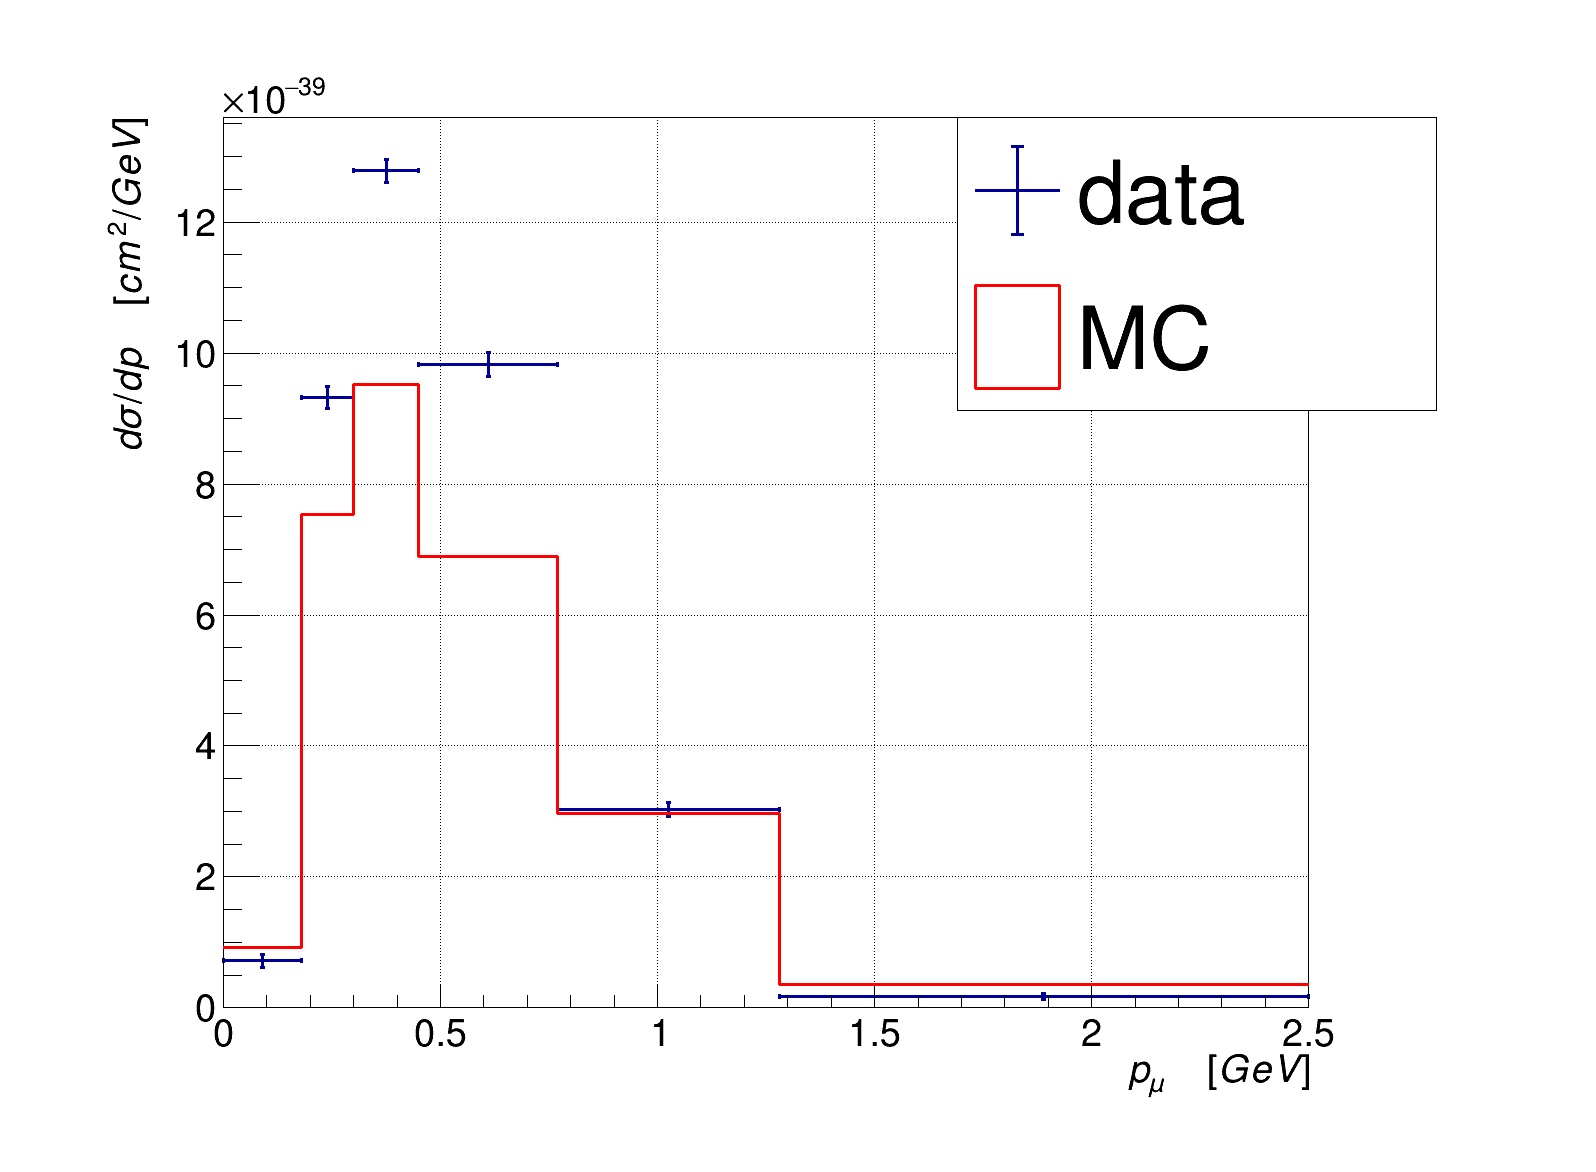

In [38]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr.png")
c1.SaveAs(outputdir_root + "h_xsec_corr.root")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

# Now in bins of Theta

In [39]:
from array import array
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

646

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h_eff_trueTheta.root has been created


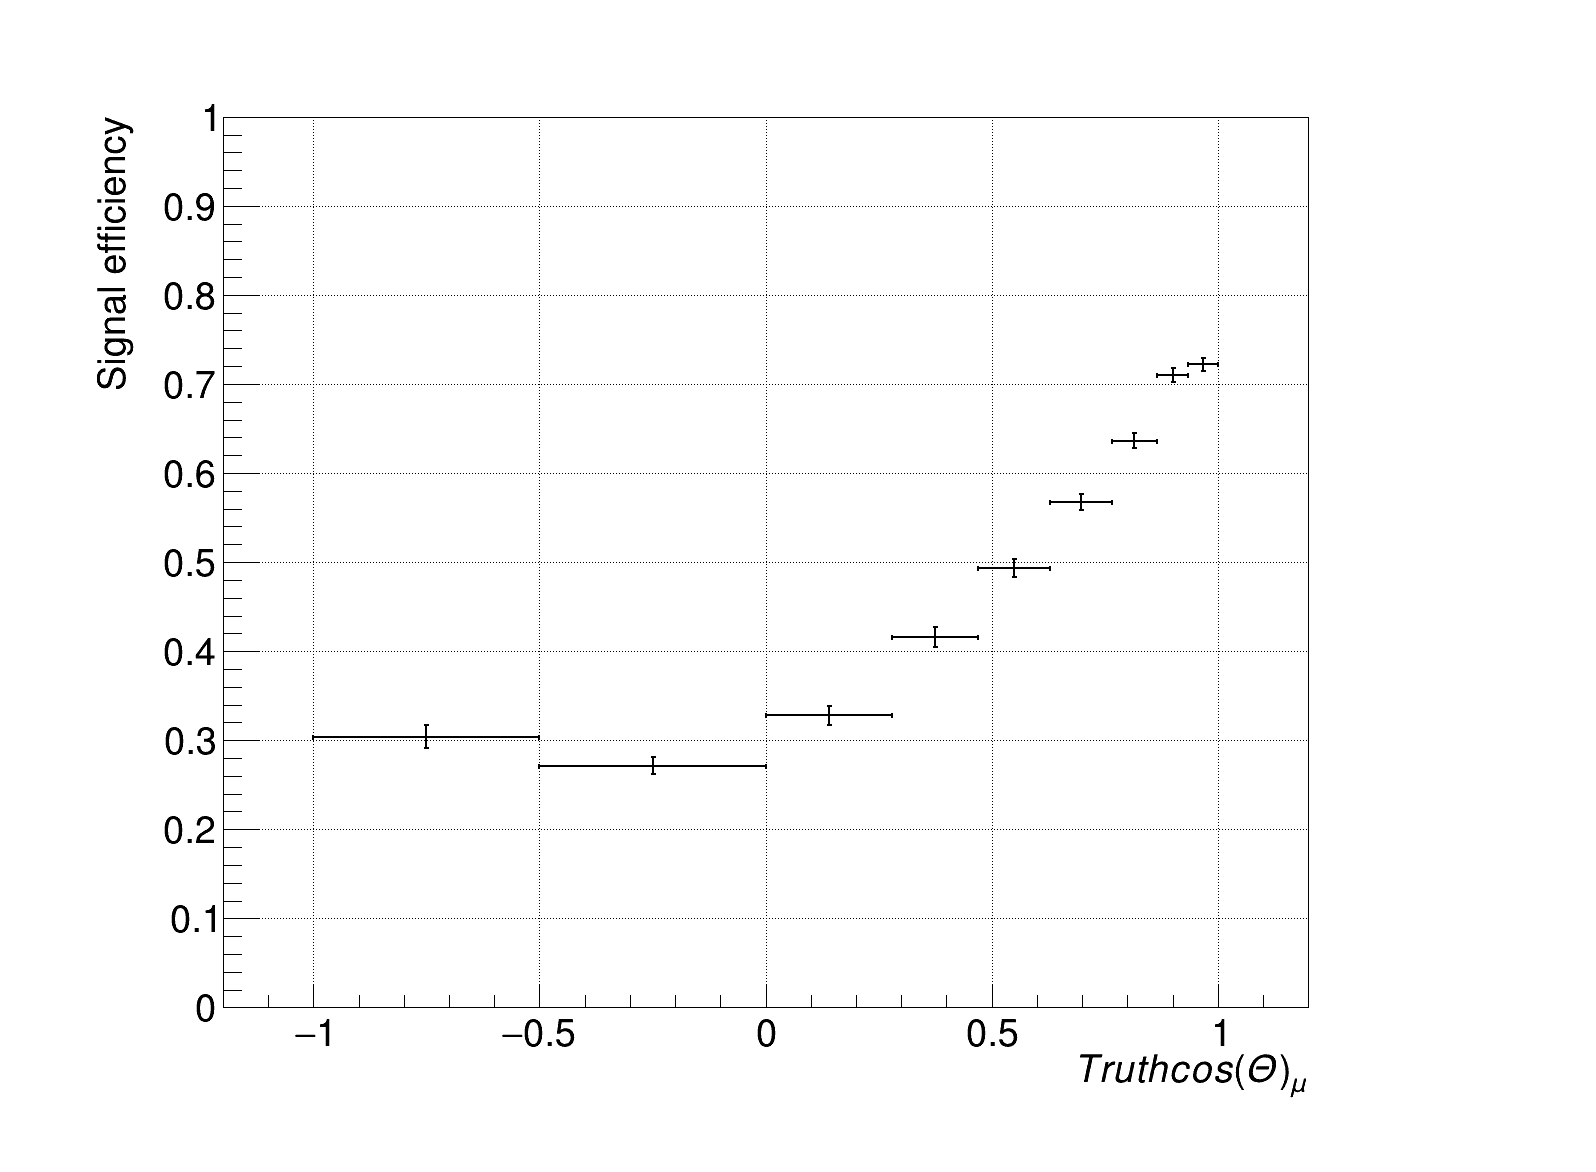

In [40]:
# calculate true theta
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth cos(\Theta)_{\mu}")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(outputdir_root + "h_eff_trueTheta.root")

eff.Write("h_eff_true_theta")

8882

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h2_true_Theta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h2_true_Theta.png has been created


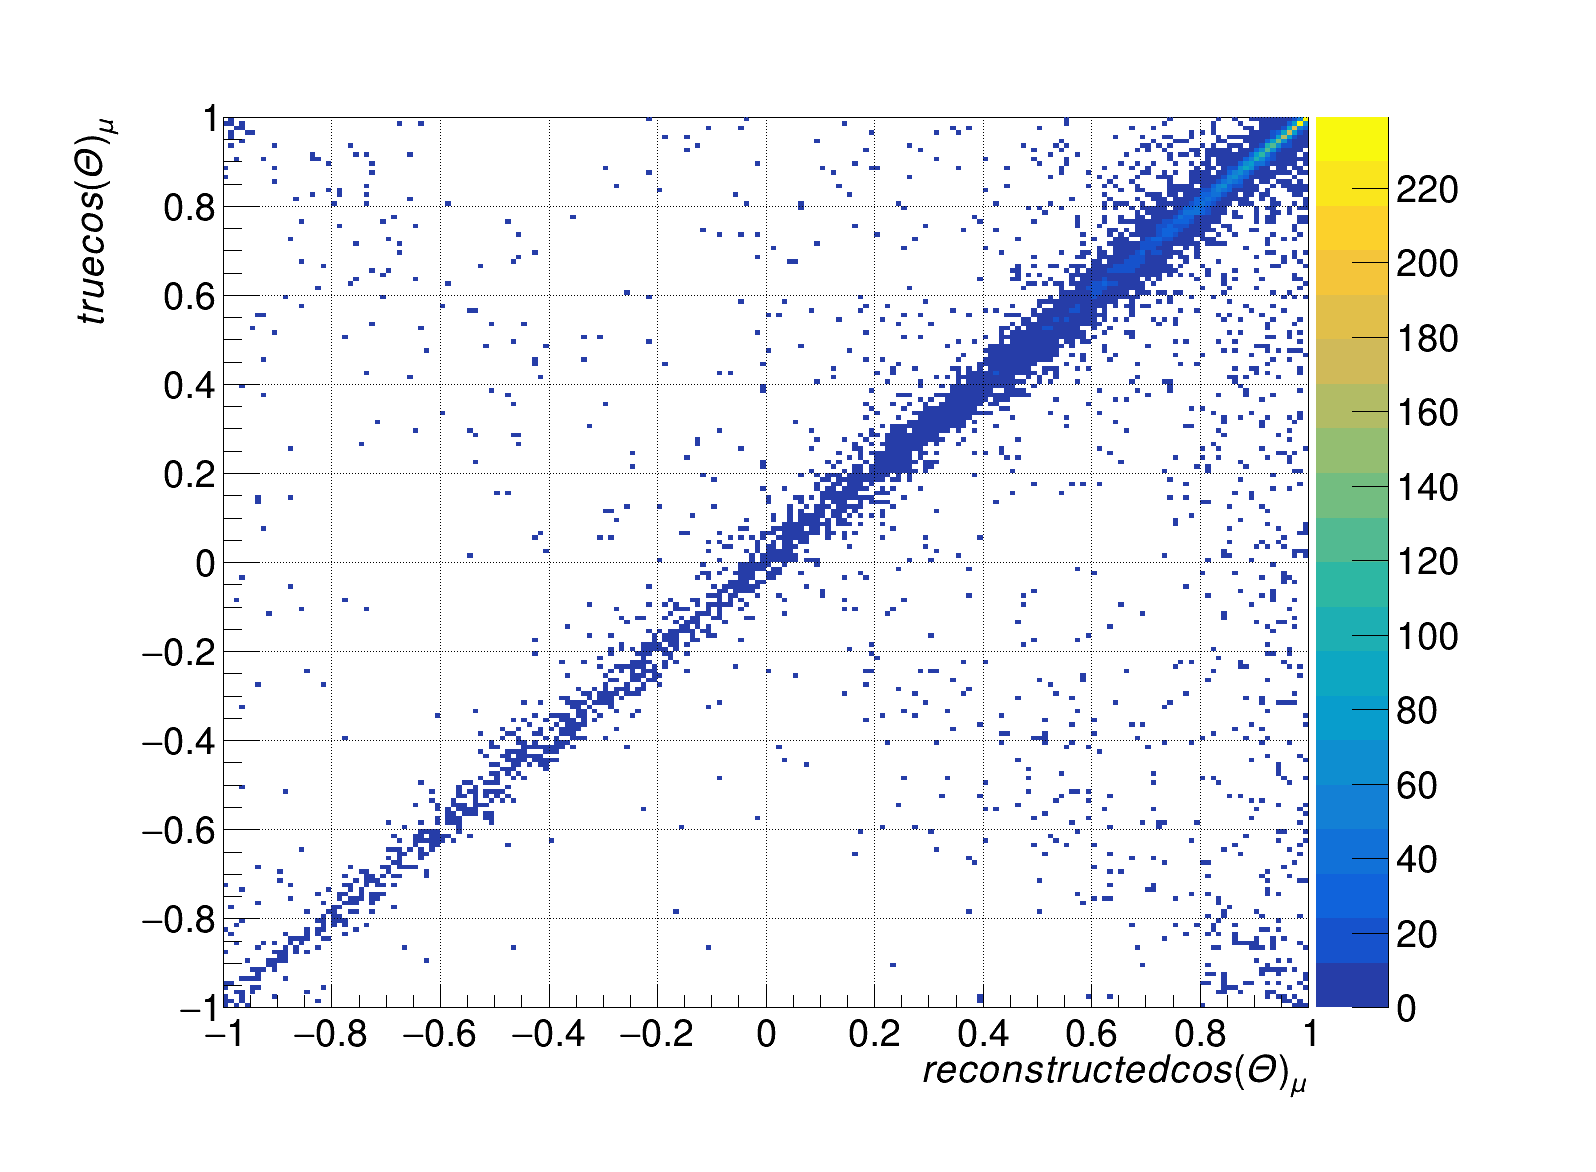

In [41]:
# plot fine binned reco true
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,1)
detsys_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&&'+'numu_true'+')','')
h_migration.SetXTitle("reconstructed cos(\Theta)_{\mu}")
h_migration.SetYTitle("true cos(\Theta)_{\mu}")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_Theta.root")
c1.SaveAs(outputdir_png + "h2_true_Theta.png")
h_migration.Write("h2_true_theta_fine")

728

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h2_true_Theta_bin.png has been created


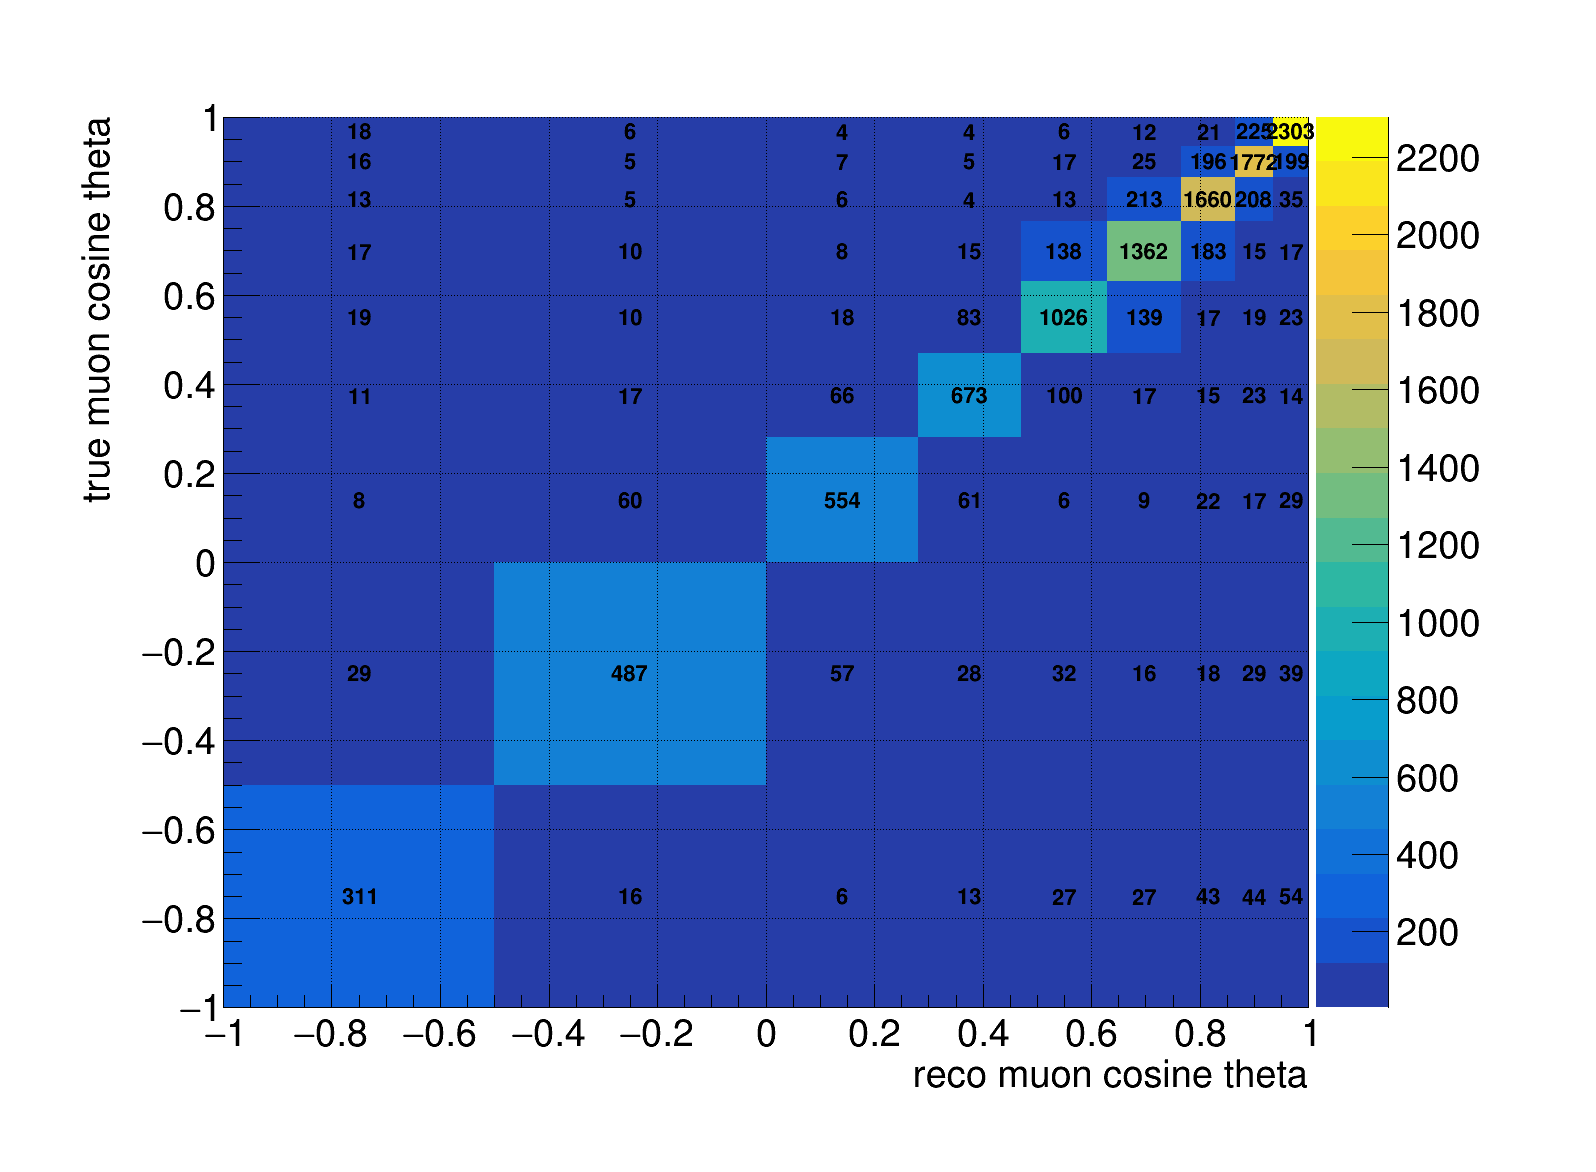

In [42]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&&'+'numu_true'+')','')
h_migration.SetXTitle("reco muon cosine theta")
h_migration.SetYTitle("true muon cosine theta")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(outputdir_png + "h2_true_Theta_bin.png")
h_migration.Write("h2_true_Theta_bin")

[[0.57486137 0.03945578 0.01044386 0.01175214 0.0140325  0.00963173
  0.00602689 0.00713649 0.00692574]
 [0.02957486 0.66258503 0.07832898 0.01816239 0.00738552 0.00566572
  0.00231803 0.00223015 0.00230858]
 [0.01109057 0.07755102 0.7232376  0.07051282 0.01329394 0.00453258
  0.00278164 0.00312221 0.00153905]
 [0.02402957 0.03809524 0.07963446 0.71901709 0.06129985 0.00849858
  0.00185443 0.00223015 0.00153905]
 [0.04990758 0.04353741 0.0078329  0.10683761 0.7577548  0.07818697
  0.00602689 0.00758252 0.00230858]
 [0.04990758 0.02176871 0.01174935 0.01816239 0.10265879 0.77167139
  0.09874826 0.01115076 0.00461716]
 [0.07948244 0.0244898  0.02872063 0.01602564 0.01255539 0.10368272
  0.76958739 0.08742194 0.00808003]
 [0.08133087 0.03945578 0.02219321 0.02457265 0.0140325  0.00849858
  0.09643023 0.79036574 0.08657176]
 [0.09981516 0.05306122 0.03785901 0.01495726 0.01698671 0.00963173
  0.01622624 0.08876004 0.88611004]]


815

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h_mitigation_theta_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h_mitigation_theta_matrix.root has been created


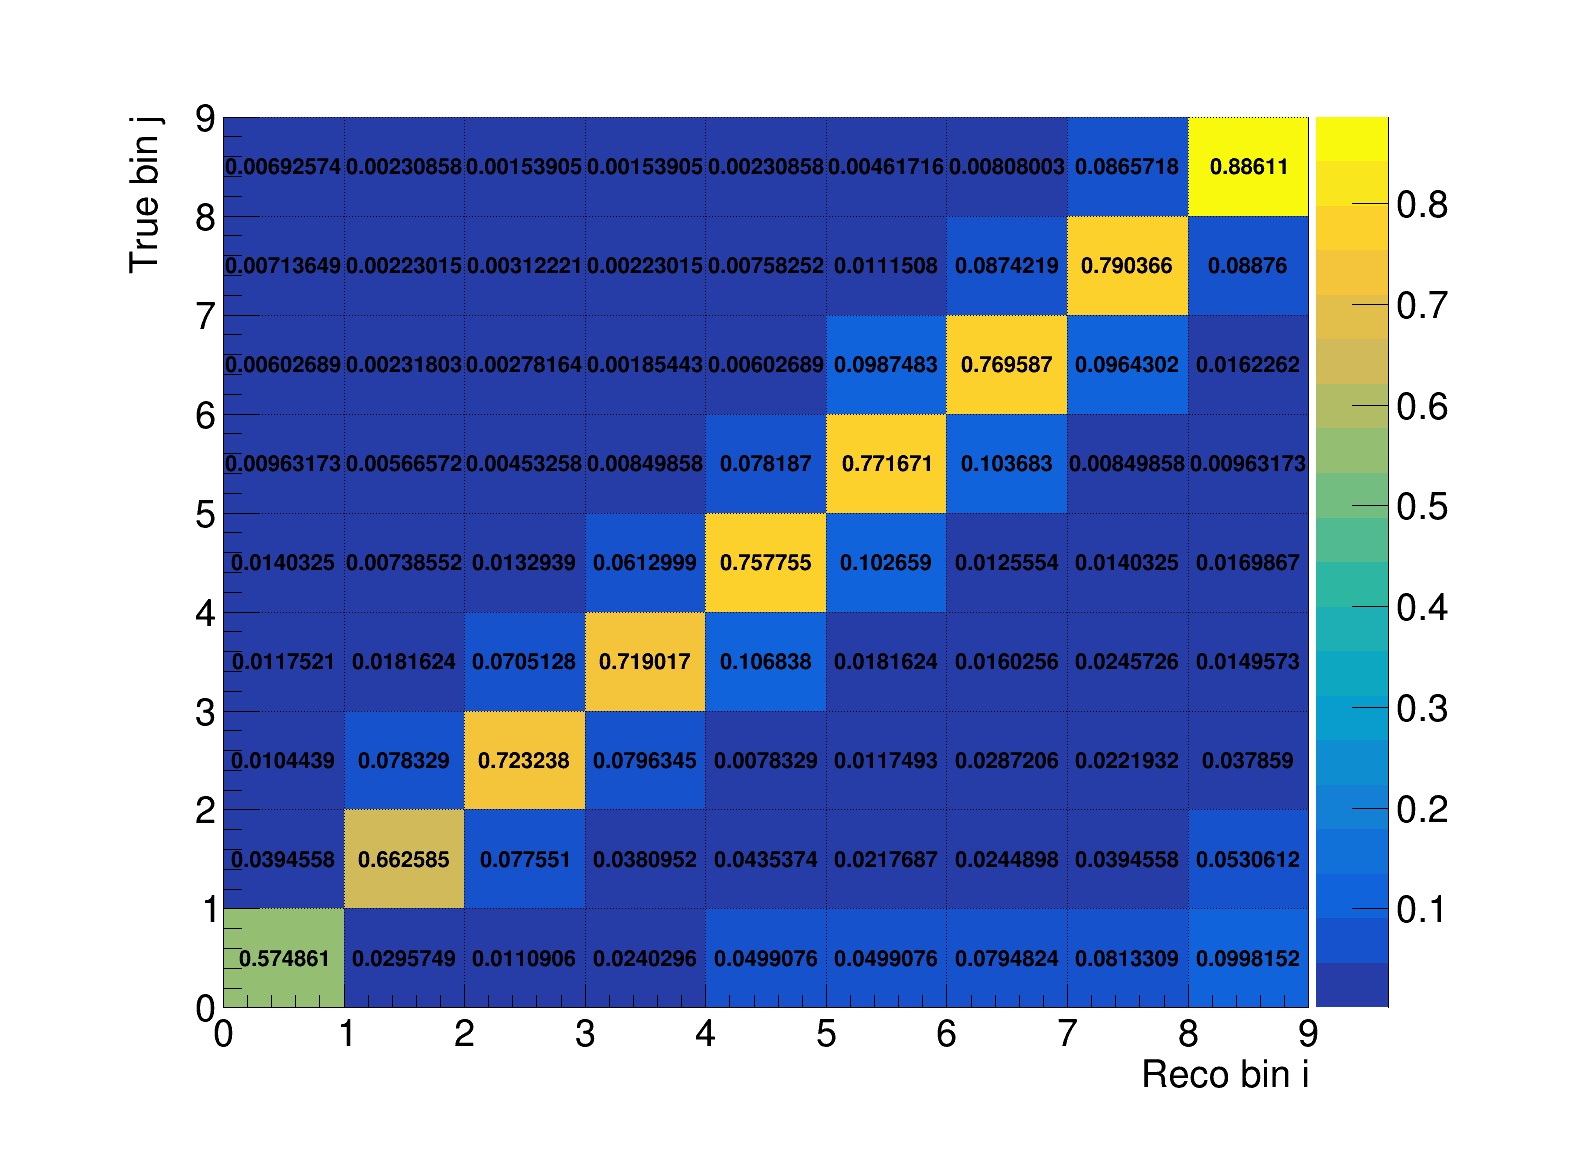

In [43]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
np.save(output_filedir+'migration_matrix_theta',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(outputdir_png + "h_mitigation_theta_matrix.png")
c1.SaveAs(outputdir_root + "h_mitigation_theta_matrix.root")

h_mitigation_matrix.Write("h_mitigation_theta_matrix")

In [44]:
# Nselected and N generated
title = 'cosine theta efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_theta_z")
h_init_eff_energy_1.Write("h_eff_true_theta_n")

433

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [45]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
Err_sel = np.zeros((9))
Err_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    Err_sel[i-1] = h_init_eff_energy.GetBinError(i)
    Err_gen[i-1] = h_init_eff_energy_1.GetBinError(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((9))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
err_tilde = np.zeros((9))
err_tilde = mitigation_matrix.dot(Err_sel)/(mitigation_matrix.dot(Err_gen))
print eff_tilde
print err_tilde
np.save(output_filedir+'eff_tilde_theta_xsec_CV',eff_tilde)


388.0 1277.0 0.3038371182458888
568.0 2092.0 0.27151051625239003
650.0 1983.0 0.32778618255168934
839.0 2020.0 0.4153465346534653
1229.0 2489.0 0.4937725994375251
1671.0 2944.0 0.5675951086956522
2084.0 3276.0 0.6361416361416361
2174.0 3062.0 0.7099934683213586
2546.0 3526.0 0.7220646625070902
[0.34446496 0.29164409 0.33891744 0.41121487 0.48391547 0.55757134
 0.61250302 0.66841646 0.67960079]
[0.57218679 0.53663345 0.57930756 0.63826806 0.69054321 0.74118125
 0.77366609 0.80630788 0.80975673]


In [46]:
for i in range(1,binnum+1):
    Err_sel[i-1] =  (eff.GetEfficiencyErrorLow(i) +  eff.GetEfficiencyErrorUp(i))/2.0
    print Err_sel[i-1]
    
err_tilde = mitigation_matrix.dot(Err_sel)
print err_tilde

0.01318558422395491
0.009906642835171287
0.010732345893859296
0.011148254803395763
0.010164569022767134
0.009248186804246439
0.008510439629078992
0.008316932934529064
0.007643364726411972
[0.00860915 0.00818048 0.00970109 0.01031247 0.01092183 0.01035076
 0.0102024  0.01025241 0.01032575]


518

Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h_eff_tilde_xsecTheta.root has been created


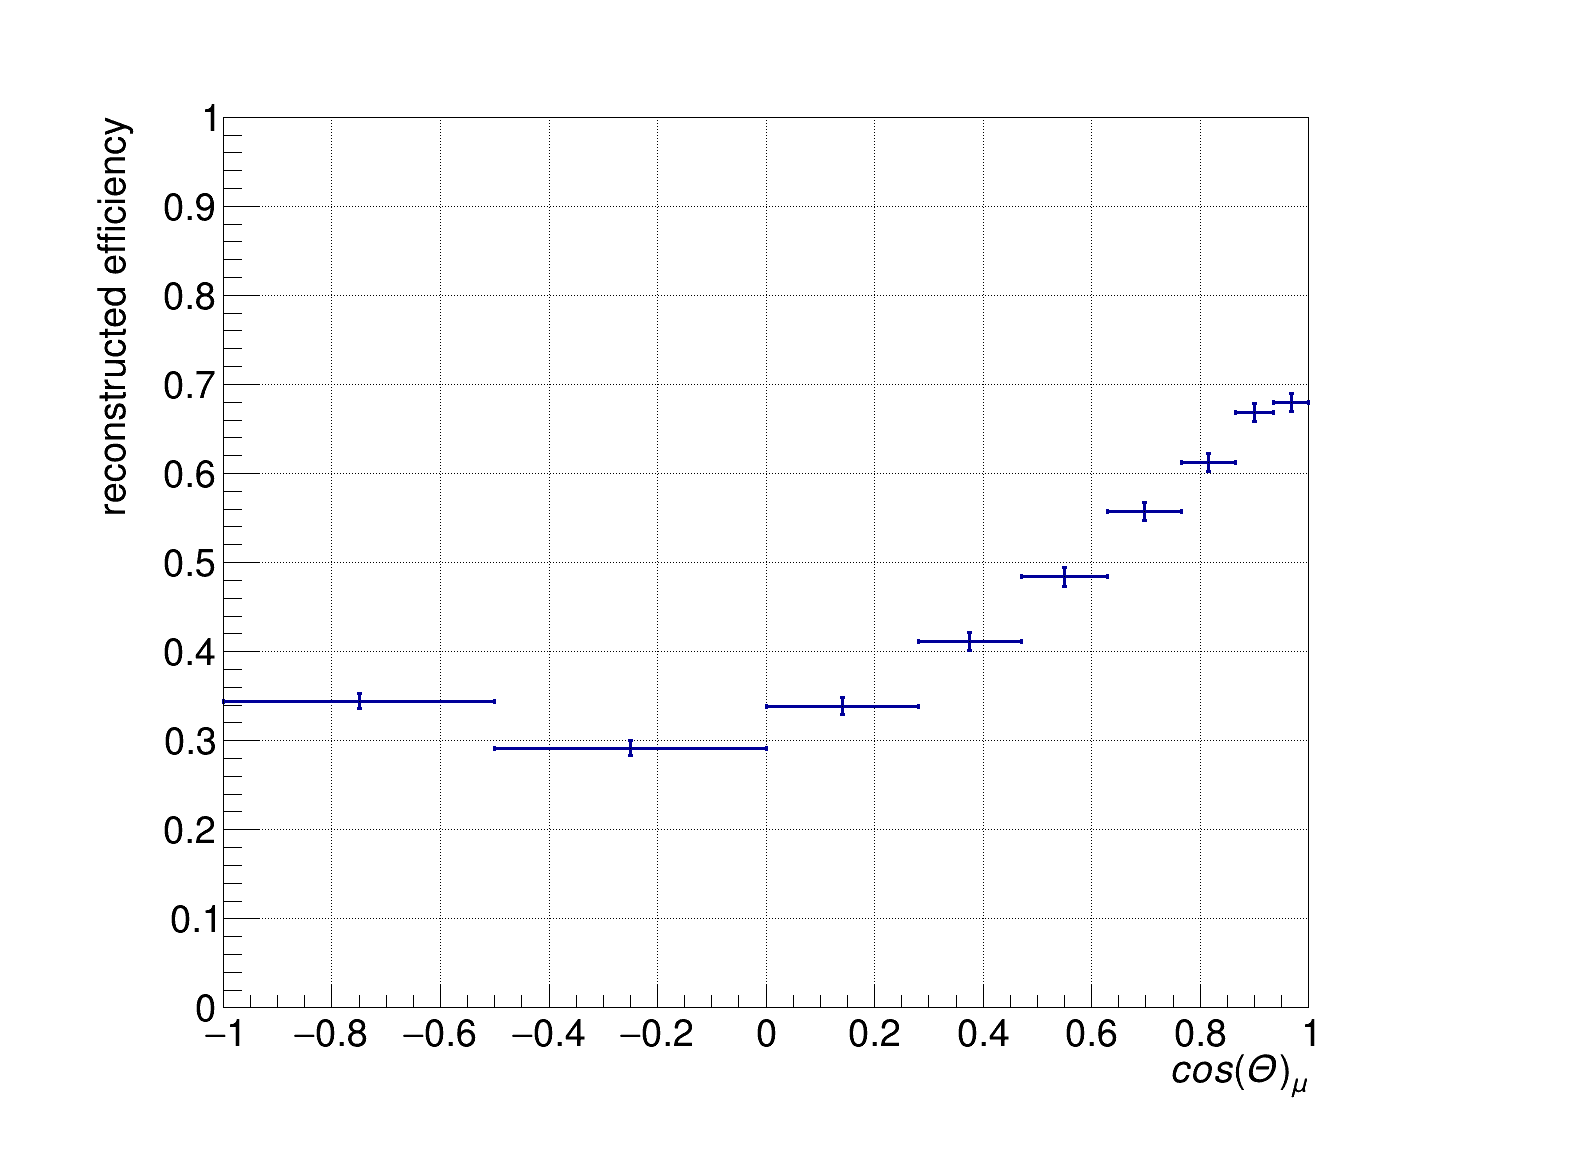

In [47]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,err_tilde[i-1])
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.SetXTitle("cos(\Theta)_{\mu}")
h_eff_tilde.SetYTitle("reconstructed efficiency")
h_eff_tilde.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecTheta.root")

h_eff_tilde.Write("h_eff_theta_tilde")

In [48]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

data_out.Draw(variable+'>>h_data',cut,'')
ext_out.Draw(variable+'>>h_ext',cut,'')
dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !'+'numu_signal'+')','')


2723L

Warning in <TFile::Append>: Replacing existing TH1: h_data (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_ext (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_dirt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_overlay (Potential memory leak).


In [49]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data_theta")
h_ext.Write("h_ext_theta")
h_dirt.Write("h_dirt_theta")
h_overlay.Write("h_overlay_theta")

462

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [50]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

185.406046867
988.2850914


In [51]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [52]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&&'+'numu_signal'+')','')
h_overlay_sig.Scale(scale[detsys])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

Warning in <TFile::Append>: Replacing existing TH1: h_overlay_sig (Potential memory leak).


In [53]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))

479

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/png/h_xsec_corr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/root/h_xsec_corr_theta.root has been created


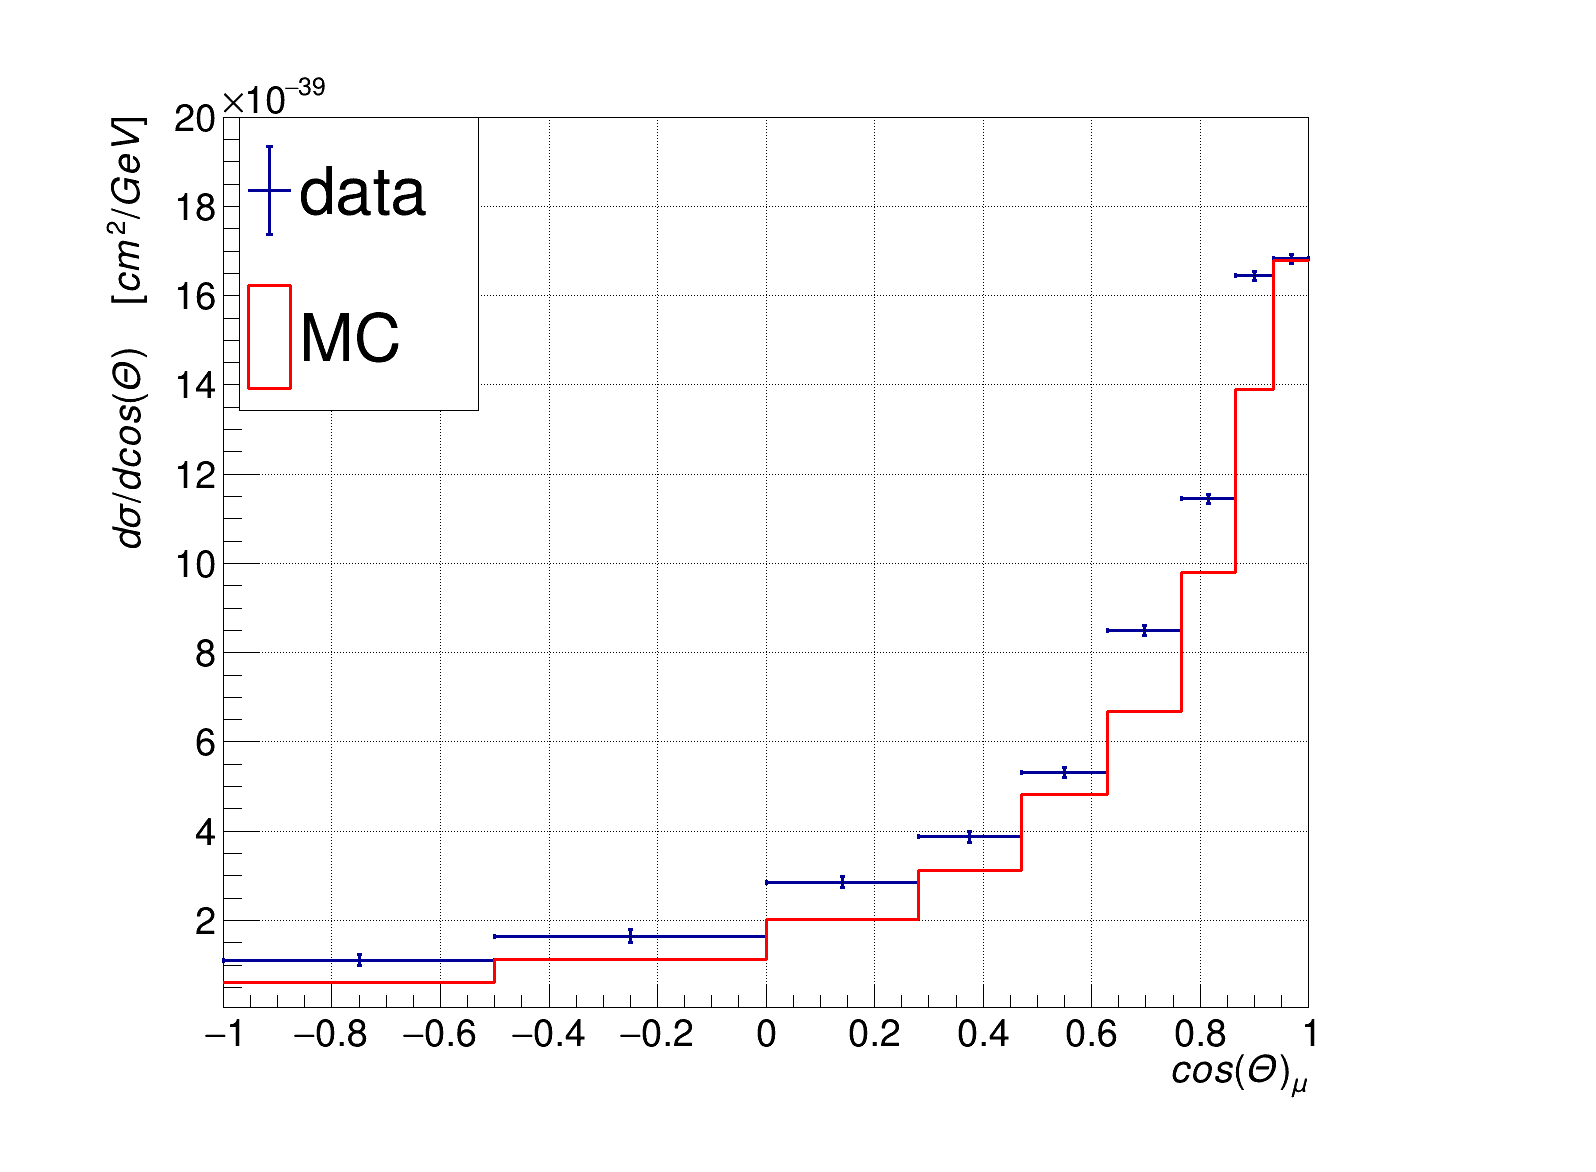

In [54]:
#legend = ROOT.TLegend(0.6,0.65,0.9,0.9) # rigth
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # left
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetXTitle("cos(\Theta)_{\mu}")
h_data.SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(20e-39)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta.root")

h_data.Write("h_xsec_data_theta")
h_overlay_sig.Write("h_xsec_MC_theta")

In [55]:
RootFile.Close()